In [ ]:
le

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

/home/s/S.Rasp/miniconda3/envs/fastai/lib/python3.7/site-packages/matplotlib/font_manager.py:232: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [3]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '1'

In [4]:
from fastai.vision import *
from fastai.callbacks.hooks import *

In [5]:
get_ipython().config.get('IPKernelApp', {})['parent_appname'] = ""

In [6]:
SSDDIR = '/local/S.Rasp/cloud-classification/'

In [7]:
df = pd.read_csv(SSDDIR + 'fastai.csv', index_col=0); df.head()

,fn,mask
0,Region1_MAM_Aqua/Aqua_CorrectedReflectance2007...,masks/Region1_MAM_Aqua/Aqua_CorrectedReflectan...
1,Region3_DJF_Aqua/Aqua_CorrectedReflectance2015...,masks/Region3_DJF_Aqua/Aqua_CorrectedReflectan...
2,Region3_SON_Terra/Terra_CorrectedReflectance20...,masks/Region3_SON_Terra/Terra_CorrectedReflect...
3,Region1_DJF_Aqua/Aqua_CorrectedReflectance2011...,masks/Region1_DJF_Aqua/Aqua_CorrectedReflectan...
4,Region1_DJF_Aqua/Aqua_CorrectedReflectance2011...,masks/Region1_DJF_Aqua/Aqua_CorrectedReflectan...


In [8]:
len(df)

30236

In [9]:
df.fn.apply(lambda fn: 'Region2' in fn).sum()

6030

In [10]:
df['mask'] = df['mask'].apply(lambda fn: SSDDIR + fn); df.head()

,fn,mask
0,Region1_MAM_Aqua/Aqua_CorrectedReflectance2007...,/local/S.Rasp/cloud-classification/masks/Regio...
1,Region3_DJF_Aqua/Aqua_CorrectedReflectance2015...,/local/S.Rasp/cloud-classification/masks/Regio...
2,Region3_SON_Terra/Terra_CorrectedReflectance20...,/local/S.Rasp/cloud-classification/masks/Regio...
3,Region1_DJF_Aqua/Aqua_CorrectedReflectance2011...,/local/S.Rasp/cloud-classification/masks/Regio...
4,Region1_DJF_Aqua/Aqua_CorrectedReflectance2011...,/local/S.Rasp/cloud-classification/masks/Regio...


In [11]:
src = SegmentationItemList.from_df(df, path = SSDDIR); src

SegmentationItemList (30236 items)
[Image (3, 1400, 2100), Image (3, 1400, 2100), Image (3, 1400, 2100), Image (3, 1400, 2100), Image (3, 1400, 2100)]...
Path: /local/S.Rasp/cloud-classification

In [12]:
src = src.split_by_valid_func(lambda fn: 'Region2' in fn); src

ItemLists;

Train: SegmentationItemList (24206 items)
[Image (3, 1400, 2100), Image (3, 1400, 2100), Image (3, 1400, 2100), Image (3, 1400, 2100), Image (3, 1400, 2100)]...
Path: /local/S.Rasp/cloud-classification;

Valid: SegmentationItemList (6030 items)
[Image (3, 1400, 2100), Image (3, 1400, 2100), Image (3, 1400, 2100), Image (3, 1400, 2100), Image (3, 1400, 2100)]...
Path: /local/S.Rasp/cloud-classification;

Test: None

In [13]:
src = src.label_from_df('mask', classes=['Background', 'Sugar', 'Flower', 'Fish', 'Gravel']); src

LabelLists;

Train: LabelList
y: SegmentationLabelList (24206 items)
[ImageSegment (1, 1400, 2100), ImageSegment (1, 1400, 2100), ImageSegment (1, 1400, 2100), ImageSegment (1, 1400, 2100), ImageSegment (1, 1400, 2100)]...
Path: /local/S.Rasp/cloud-classification
x: SegmentationItemList (24206 items)
[Image (3, 1400, 2100), Image (3, 1400, 2100), Image (3, 1400, 2100), Image (3, 1400, 2100), Image (3, 1400, 2100)]...
Path: /local/S.Rasp/cloud-classification;

Valid: LabelList
y: SegmentationLabelList (6030 items)
[ImageSegment (1, 1400, 2100), ImageSegment (1, 1400, 2100), ImageSegment (1, 1400, 2100), ImageSegment (1, 1400, 2100), ImageSegment (1, 1400, 2100)]...
Path: /local/S.Rasp/cloud-classification
x: SegmentationItemList (6030 items)
[Image (3, 1400, 2100), Image (3, 1400, 2100), Image (3, 1400, 2100), Image (3, 1400, 2100), Image (3, 1400, 2100)]...
Path: /local/S.Rasp/cloud-classification;

Test: None

In [14]:
size = np.array([1400, 2100]) // 5; size

array([280, 420])

In [15]:
np.array([1400, 2100]) / 5

array([280., 420.])

In [33]:
data = src.transform(get_transforms(), size=size.astype(int), tfm_y=True); data

LabelLists;

Train: LabelList
y: SegmentationLabelList (24206 items)
[ImageSegment (1, 1400, 2100), ImageSegment (1, 1400, 2100), ImageSegment (1, 1400, 2100), ImageSegment (1, 1400, 2100), ImageSegment (1, 1400, 2100)]...
Path: /local/S.Rasp/cloud-classification
x: SegmentationItemList (24206 items)
[Image (3, 1400, 2100), Image (3, 1400, 2100), Image (3, 1400, 2100), Image (3, 1400, 2100), Image (3, 1400, 2100)]...
Path: /local/S.Rasp/cloud-classification;

Valid: LabelList
y: SegmentationLabelList (6030 items)
[ImageSegment (1, 1400, 2100), ImageSegment (1, 1400, 2100), ImageSegment (1, 1400, 2100), ImageSegment (1, 1400, 2100), ImageSegment (1, 1400, 2100)]...
Path: /local/S.Rasp/cloud-classification
x: SegmentationItemList (6030 items)
[Image (3, 1400, 2100), Image (3, 1400, 2100), Image (3, 1400, 2100), Image (3, 1400, 2100), Image (3, 1400, 2100)]...
Path: /local/S.Rasp/cloud-classification;

Test: None

In [34]:
data = data.databunch(bs=4*3)

In [35]:
data = data.normalize(imagenet_stats)

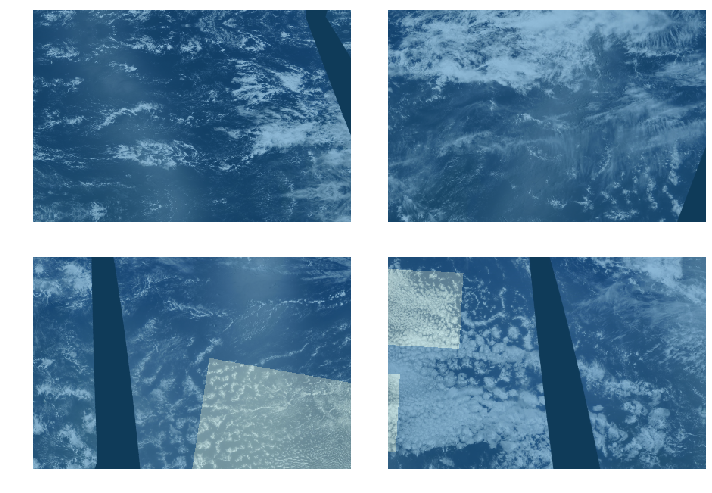

In [36]:
data.show_batch(2, figsize=(10,7))

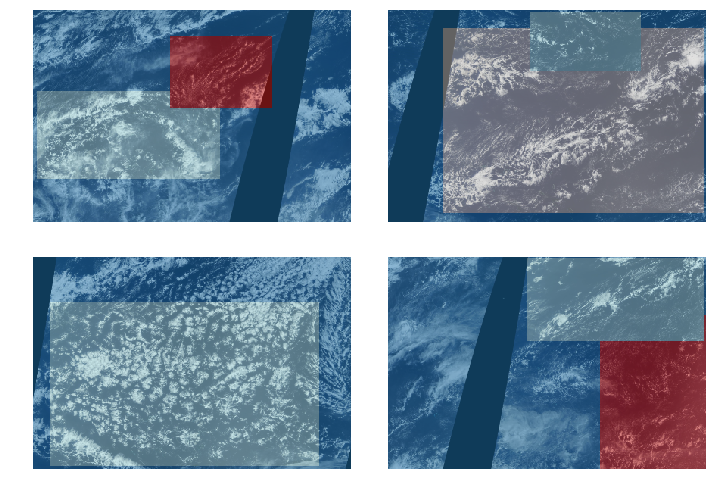

In [37]:
data.show_batch(2, figsize=(10,7), ds_type=DatasetType.Valid)

In [38]:
x, y = next(iter(data.valid_dl))

In [39]:
x.size()

torch.Size([12, 3, 280, 420])

In [40]:
y.size()

torch.Size([12, 1, 280, 420])

## model

In [41]:
codes = ['Background', 'Sugar', 'Flower', 'Fish', 'Gravel']

In [42]:
name2id = {v:k for k,v in enumerate(codes)}
void_code = name2id['Background']

def acc_camvid(input, target):
    target = target.squeeze(1)
    mask = target != void_code
    return (input.argmax(dim=1)[mask]==target[mask]).float().mean()

In [43]:
metrics=acc_camvid

In [44]:
wd=1e-2

In [45]:
learn = unet_learner(data, models.resnet18, metrics=metrics, wd=wd, pretrained=False)

In [46]:
learn.loss_func

FlattenedLoss of CrossEntropyLoss()

In [47]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


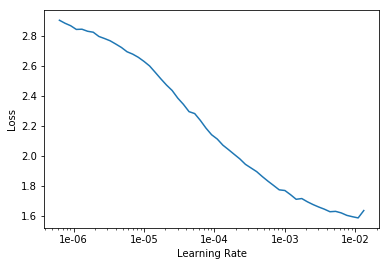

In [48]:
lr_find(learn)
learn.recorder.plot()

In [53]:
lr = 1e-3

In [49]:
doc(learn.fit_one_cycle)

In [54]:
learn.fit_one_cycle(1, max_lr=lr, wd=wd)

epoch,train_loss,valid_loss,acc_camvid
1,0.752129,0.798114,0.066871


In [55]:
learn.save('npt1')

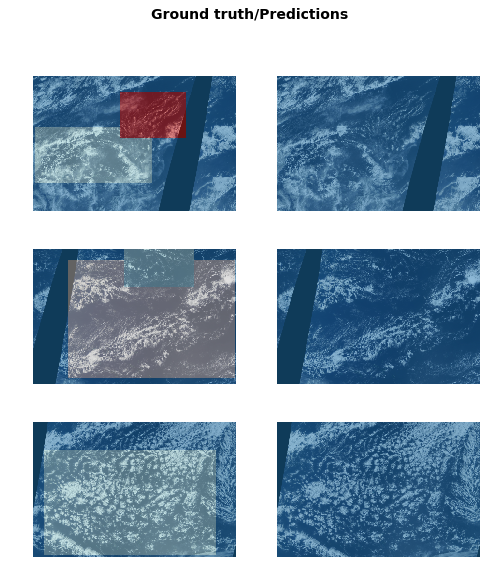

In [56]:
learn.show_results(rows=3, figsize=(8,9))

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


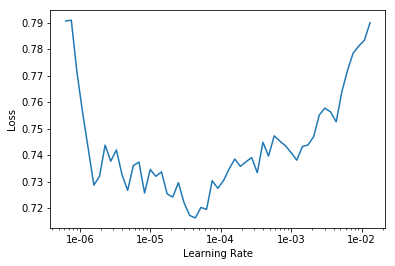

In [57]:
lr_find(learn)
learn.recorder.plot()

In [58]:
learn.fit_one_cycle(1, max_lr=lr, wd=wd)

epoch,train_loss,valid_loss,acc_camvid
1,0.761082,0.780860,0.092709


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


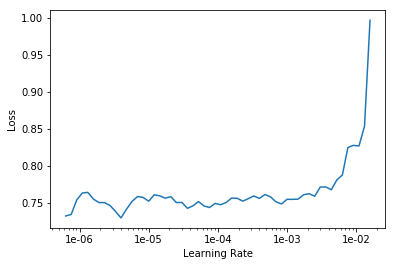

In [59]:
lr_find(learn)
learn.recorder.plot()

In [60]:
learn.fit_one_cycle(3, max_lr=1e-7, wd=wd)

epoch,train_loss,valid_loss,acc_camvid
1,0.765709,0.783588,0.102375
2,0.750067,0.782558,0.094287
3,0.753967,0.782395,0.091005


In [37]:
learn.validate()

KeyboardInterrupt: 

In [30]:
learn.fit_one_cycle(1, slice(lr), pct_start=0.9)

epoch,train_loss,valid_loss,acc_camvid


KeyboardInterrupt: 

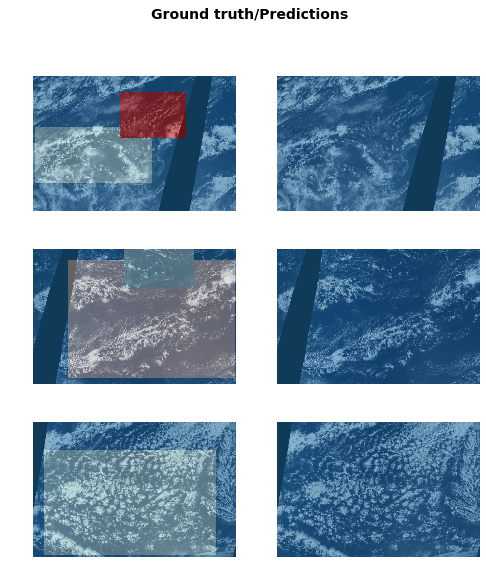

In [38]:
learn.show_results(rows=3, figsize=(8,9))

In [33]:
learn.unfreeze()

In [35]:
lrs = slice(lr/100,lr)

In [38]:
learn.fit_one_cycle(10, lrs, pct_start=0.8)

epoch,train_loss,valid_loss,acc_camvid


RuntimeError: CUDA out of memory. Tried to allocate 26.00 MiB (GPU 0; 7.93 GiB total capacity; 5.04 GiB already allocated; 39.88 MiB free; 16.65 MiB cached)

In [37]:
lr_find(learn)
learn.recorder.plot()

RuntimeError: CUDA out of memory. Tried to allocate 9.00 MiB (GPU 0; 7.93 GiB total capacity; 4.93 GiB already allocated; 25.50 MiB free; 4.90 MiB cached)

In [29]:
%debug

> /home/s/S.Rasp/miniconda3/envs/fastai/lib/python3.7/site-packages/fastai/layers.py(138)forward()
    136         self.dense=dense
    137 
--> 138     def forward(self, x): return torch.cat([x,x.orig], dim=1) if self.dense else (x+x.orig)
    139 
    140 def res_block(nf, dense:bool=False, norm_type:Optional[NormType]=NormType.Batch, bottle:bool=False, **kwargs):

ipdb> x.size()
torch.Size([4, 96, 350, 526])
ipdb> u
> /home/s/S.Rasp/miniconda3/envs/fastai/lib/python3.7/site-packages/torch/nn/modules/module.py(489)__call__()
    487             result = self._slow_forward(*input, **kwargs)
    488         else:
--> 489             result = self.forward(*input, **kwargs)
    490         for hook in self._forward_hooks.values():
    491             hook_result = hook(self, input, result)

ipdb> input
(tensor([[[[5.2514e-01, 5.2514e-01, 6.2654e-01,  ..., 1.5393e-02,
           3.3550e-01, 6.5560e-01],
          [5.2514e-01, 5.2514e-01, 6.2654e-01,  ..., 1.5393e-02,
           3.3550e-01

ipdb> input.size()
*** AttributeError: 'tuple' object has no attribute 'size'
ipdb> input[0].size()
torch.Size([4, 96, 350, 526])
ipdb> l
    484         for hook in self._forward_pre_hooks.values():
    485             hook(self, input)
    486         if torch._C._get_tracing_state():
    487             result = self._slow_forward(*input, **kwargs)
    488         else:
--> 489             result = self.forward(*input, **kwargs)
    490         for hook in self._forward_hooks.values():
    491             hook_result = hook(self, input, result)
    492             if hook_result is not None:
    493                 raise RuntimeError(
    494                     "forward hooks should never return any values, but '{}'"

ipdb> u
> /home/s/S.Rasp/miniconda3/envs/fastai/lib/python3.7/site-packages/fastai/layers.py(121)forward()
    119         for l in self.layers:
    120             res.orig = x
--> 121             nres = l(res)
    122             # We have to remove res.orig to avoi

ipdb> res[0].size()
torch.Size([96, 350, 526])
ipdb> l
    116 
    117     def forward(self, x):
    118         res = x
    119         for l in self.layers:
    120             res.orig = x
--> 121             nres = l(res)
    122             # We have to remove res.orig to avoid hanging refs and therefore memory leaks
    123             res.orig = None
    124             res = nres
    125         return res
    126 

ipdb> u
> /home/s/S.Rasp/miniconda3/envs/fastai/lib/python3.7/site-packages/torch/nn/modules/module.py(489)__call__()
    487             result = self._slow_forward(*input, **kwargs)
    488         else:
--> 489             result = self.forward(*input, **kwargs)
    490         for hook in self._forward_hooks.values():
    491             hook_result = hook(self, input, result)

ipdb> u
> /home/s/S.Rasp/miniconda3/envs/fastai/lib/python3.7/site-packages/fastai/basic_train.py(20)loss_batch()
     18     if not is_listy(xb): xb = [xb]
     19     if not is_listy(y

ipdb> len(xb)
1
ipdb> xb[0].size()
torch.Size([4, 3, 350, 525])
ipdb> q


In [80]:
size

array([350, 525])

In [35]:
for i, r in df.iterrows():
    img = PIL.Image.open(SSDDIR + r['fn'])
    print(np.array(img).shape)

(1400, 2100, 3)
(1400, 2100, 3)
(1400, 2100, 3)
(1400, 2100, 3)
(1400, 2100, 3)
(1400, 2100, 3)
(1400, 2100, 3)
(1400, 2100, 3)
(1400, 2100, 3)
(1400, 2100, 3)
(1400, 2100, 3)
(1400, 2100, 3)
(1400, 2100, 3)
(1400, 2100, 3)
(1400, 2100, 3)
(1400, 2100, 3)
(1400, 2100, 3)
(1400, 2100, 3)
(1400, 2100, 3)
(1400, 2100, 3)
(1400, 2100, 3)
(1400, 2100, 3)
(1400, 2100, 3)
(1400, 2100, 3)
(1400, 2100, 3)
(1400, 2100, 3)
(1400, 2100, 3)
(1400, 2100, 3)
(1400, 2100, 3)
(1400, 2100, 3)
(1400, 2100, 3)
(1400, 2100, 3)
(1400, 2100, 3)
(1400, 2100, 3)
(1400, 2100, 3)
(1400, 2100, 3)
(1400, 2100, 3)
(1400, 2100, 3)
(1400, 2100, 3)
(1400, 2100, 3)
(1400, 2100, 3)
(1400, 2100, 3)
(1400, 2100, 3)
(1400, 2100, 3)
(1400, 2100, 3)
(1400, 2100, 3)
(1400, 2100, 3)
(1400, 2100, 3)
(1400, 2100, 3)
(1400, 2100, 3)
(1400, 2100, 3)
(1400, 2100, 3)
(1400, 2100, 3)
(1400, 2100, 3)
(1400, 2100, 3)
(1400, 2100, 3)
(1400, 2100, 3)
(1400, 2100, 3)
(1400, 2100, 3)
(1400, 2100, 3)
(1400, 2100, 3)
(1400, 2100, 3)
(1400, 2

In [36]:
for i, r in df.iterrows():
    img = PIL.Image.open(r['mask'])
    print(np.array(img).shape)

(1400, 2100)
(1400, 2100)
(1400, 2100)
(1400, 2100)
(1400, 2100)
(1400, 2100)
(1400, 2100)
(1400, 2100)
(1400, 2100)
(1400, 2100)
(1400, 2100)
(1400, 2100)
(1400, 2100)
(1400, 2100)
(1400, 2100)
(1400, 2100)
(1400, 2100)
(1400, 2100)
(1400, 2100)
(1400, 2100)
(1400, 2100)
(1400, 2100)
(1400, 2100)
(1400, 2100)
(1400, 2100)
(1400, 2100)
(1400, 2100)
(1400, 2100)
(1400, 2100)
(1400, 2100)
(1400, 2100)
(1400, 2100)
(1400, 2100)
(1400, 2100)
(1400, 2100)
(1400, 2100)
(1400, 2100)
(1400, 2100)
(1400, 2100)
(1400, 2100)
(1400, 2100)
(1400, 2100)
(1400, 2100)
(1400, 2100)
(1400, 2100)
(1400, 2100)
(1400, 2100)
(1400, 2100)
(1400, 2100)
(1400, 2100)
(1400, 2100)
(1400, 2100)
(1400, 2100)
(1400, 2100)
(1400, 2100)
(1400, 2100)
(1400, 2100)
(1400, 2100)
(1400, 2100)
(1400, 2100)
(1400, 2100)
(1400, 2100)
(1400, 2100)
(1400, 2100)
(1400, 2100)
(1400, 2100)
(1400, 2100)
(1400, 2100)
(1400, 2100)
(1400, 2100)
(1400, 2100)
(1400, 2100)
(1400, 2100)
(1400, 2100)
(1400, 2100)
(1400, 2100)
(1400, 2100)